Dataset Description
* The challenge of this competition is to predict if the car purchased at the Auction is a good / bad buy.
* All the variables in the data set are defined in the file Carvana_Data_Dictionary.txt 
* The data contains missing values 
* The dependent variable (IsBadBuy) is binary (C2)
* There are 32 Independent variables (C3-C34)
* The data set is split to 60% training and 40% testing.

## Problem Statement

dataset from the [Don't Get Kicked!](https://www.kaggle.com/competitions/DontGetKicked/overview) competition on Kaggle: 
One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".

Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.

Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to provide the best inventory selection possible to their customers.

OBJECTIVE:
**The challenge of this competition is to predict if the car purchased at the Auction is a Kick (bad buy)**.
* IsBadBuy= 0/1
* Classification problem 



Planing
1. Select best performing ML Models
2. Fine tune those models
3. use Voteclassifier to ensemble those model and get best accuracy than those models

1. Pick a large real-world dataset from Kaggle (see the "Resources" section below) and download it using opendatasets. Your training set should contain at least 50,000 rows and 5 columns of data.

## Downloading the Data

In [1]:
import os
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [2]:
dataset_url = 'https://www.kaggle.com/competitions/DontGetKicked/data'

In [3]:
# for first time to donwload the dataset
#od.download(dataset_url)

In [4]:
os.listdir('DontGetKicked')

['Carvana_Data_Dictionary.txt',
 'example_entry.csv',
 'test.csv',
 'test.zip',
 'training.csv',
 'training.zip']

In [5]:
cars_info_df = pd.read_csv('./DontGetKicked/training.csv')
cars_info_test_df = pd.read_csv('./DontGetKicked/test.csv')

3. Perform exploratory data analysis, gather insights about the data, perform feature engineering, create a training-validation split, and prepare the data for modeling.

## Exploratory Data Analysis

### Features info

* **Field Name**				Definition
* **RefID**				        Unique (sequential) number assigned to vehicles
* **IsBadBuy**				Identifies if the kicked vehicle was an avoidable purchase 
* **PurchDate**				The Date the vehicle was Purchased at Auction
* **Auction**					Auction provider at which the  vehicle was purchased
* **VehYear**					The manufacturer's year of the vehicle
* **VehicleAge**				The Years elapsed since the manufacturer's year
* **Make**					Vehicle Manufacturer 
* **Model**					Vehicle Model
* **Trim**					Vehicle Trim Level
* **SubModel**				Vehicle Submodel
* **Color**					Vehicle Color
* **Transmission**				Vehicles transmission type (Automatic, Manual)
* **WheelTypeID**				The type id of the vehicle wheel
* **WheelType**				The vehicle wheel type description (Alloy, Covers)
* **VehOdo**					The vehicles odometer reading
* **Nationality**				The Manufacturer's country
* **Size**					The size category of the vehicle (Compact, SUV, etc.)
* **TopThreeAmericanName**			Identifies if the manufacturer is one of the top * three American manufacturers
* **MMRAcquisitionAuctionAveragePrice**	Acquisition price for this vehicle in average condition at time of purchase	
* **MMRAcquisitionAuctionCleanPrice**		Acquisition price for this vehicle in the above * Average condition at time of purchase
* **MMRAcquisitionRetailAveragePrice**	Acquisition price for this vehicle in the * retail market in average condition at time of purchase
* **MMRAcquisitonRetailCleanPrice**		Acquisition price for this vehicle in the * retail market in above average condition at time of purchase
* **MMRCurrentAuctionAveragePrice**		Acquisition price for this vehicle in average * condition as of current day	
* **MMRCurrentAuctionCleanPrice**		Acquisition price for this vehicle in the above * condition as of current day
* **MMRCurrentRetailAveragePrice**		Acquisition price for this vehicle in the * retail market in average condition as of current day
* **MMRCurrentRetailCleanPrice**		Acquisition price for this vehicle in the retail * market in above average condition as of current day
* **PRIMEUNIT**				Identifies if the vehicle would have a higher demand than a * standard purchase
* **AcquisitionType**				Identifies how the vehicle was aquired (Auction buy, * rade in, etc)
* **AUCGUART**				The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)
* **KickDate**				Date the vehicle was kicked back to the auction
* **BYRNO**					Unique number assigned to the buyer that purchased the * vehicle
* **VNZIP**                                   Zipcode where the car was purchased
* **VNST**                                    State where the the car was purchased
* **VehBCost**				Acquisition cost paid for the vehicle at time of purchase
* **IsOnlineSale**				Identifies if the vehicle was originally purchased online
* **WarrantyCost**                            Warranty price (term=36month  and millage=36K) 



In [6]:
cars_info_df.sample(10)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
65797,65829,0,5/6/2010,MANHEIM,2007,3,FORD,FUSION 4C,S,4D SEDAN S,PURPLE,AUTO,2.0,Covers,77738,AMERICAN,MEDIUM,FORD,8716.0,10419.0,12212.0,13623.0,8531.0,10359.0,12546.0,13910.0,NaN,NaN,19619,33411,FL,6435.0,0,803
48452,48476,0,10/14/2010,MANHEIM,2007,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,RED,AUTO,2.0,Covers,72212,AMERICAN,LARGE,GM,7531.0,8717.0,11191.0,12494.0,6814.0,7885.0,10481.0,11725.0,NaN,NaN,20928,47129,IN,7735.0,0,1974
48056,48080,1,8/21/2009,MANHEIM,2001,8,MERCURY,SABLE 3.0L V6 EFI DO,LS,4D SEDAN LS PREMIUM,GOLD,AUTO,NaN,NaN,61097,AMERICAN,MEDIUM,FORD,2242.0,3037.0,2921.0,3780.0,2242.0,3037.0,2921.0,3780.0,NaN,NaN,20928,33314,FL,4210.0,0,1125
18424,18436,0,12/8/2010,MANHEIM,2005,5,KIA,OPTIMA 4C,EX,4D SEDAN EX,GOLD,MANUAL,2.0,Covers,61746,OTHER ASIAN,MEDIUM,OTHER,3398.0,5097.0,6635.0,8447.0,4446.0,5219.0,7320.0,8047.0,NaN,NaN,19619,32824,FL,4350.0,0,728
6044,6051,1,11/30/2010,MANHEIM,2007,3,MAZDA,MAZDA6,i,4D SEDAN I,WHITE,AUTO,1.0,Alloy,76317,OTHER ASIAN,MEDIUM,OTHER,8727.0,10240.0,12228.0,13722.0,8871.0,10162.0,12459.0,13466.0,NaN,NaN,835,85040,AZ,7815.0,0,1272
44289,44313,1,6/15/2010,MANHEIM,2002,8,FORD,TAURUS,SEL,4D SEDAN SE COMFORT,BLACK,AUTO,1.0,Alloy,78396,AMERICAN,MEDIUM,FORD,2243.0,2973.0,4875.0,5712.0,2719.0,3569.0,5722.0,6706.0,NaN,NaN,20740,19440,PA,5830.0,0,1220
15328,15338,0,6/16/2010,MANHEIM,2005,5,DODGE,CARAVAN FWD V6,SXT,MINIVAN 3.3L SE,WHITE,AUTO,1.0,Alloy,74214,AMERICAN,VAN,CHRYSLER,5626.0,6949.0,8919.0,10113.0,4724.0,5956.0,9212.0,11614.0,NaN,NaN,835,94544,CA,6535.0,0,1623
57665,57693,1,9/9/2009,ADESA,2002,7,JEEP,LIBERTY 2WD V6 3.7L,Lim,4D SUV LIMITED,SILVER,AUTO,NaN,NaN,87226,AMERICAN,SMALL SUV,CHRYSLER,5512.0,6713.0,6453.0,7750.0,5515.0,6631.0,6456.0,7661.0,NaN,NaN,22808,77086,TX,6960.0,0,1023
60918,60947,0,4/15/2010,MANHEIM,2002,8,HONDA,CIVIC,EX,2D COUPE EX AUTO,BLUE,AUTO,NaN,NaN,91712,TOP LINE ASIAN,COMPACT,OTHER,4470.0,5635.0,7095.0,8243.0,3756.0,4645.0,7026.0,7708.0,NaN,NaN,19638,33762,FL,5920.0,0,1065
27742,27761,0,5/6/2009,MANHEIM,2006,3,BUICK,LACROSSE 3.8L V6 SFI,CX,4D SEDAN CX,RED,AUTO,2.0,Covers,59779,AMERICAN,LARGE,GM,8910.0,10944.0,10123.0,12320.0,9079.0,10821.0,10305.0,12187.0,NaN,NaN,21973,32824,FL,6700.0,0,1169


In [7]:
cars_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [8]:
cars_info_df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


<AxesSubplot:>

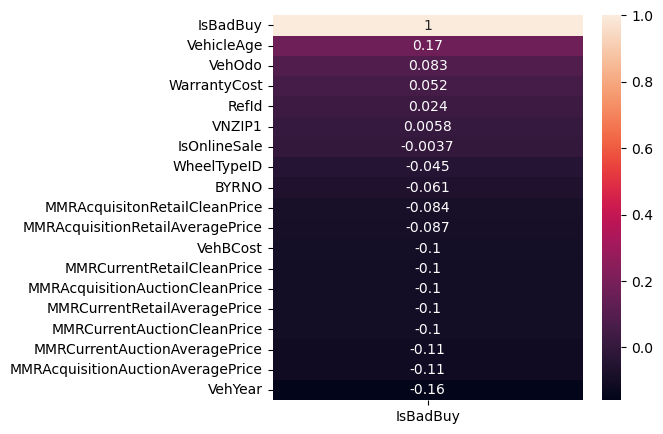

In [9]:
corr_matrix = cars_info_df.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix[['IsBadBuy']].sort_values(by='IsBadBuy', ascending=False), annot=True)

**Observation**
1. it seems VehicleAge is correlated with target
2. VehYear is inversely correlated with the target

<AxesSubplot:>

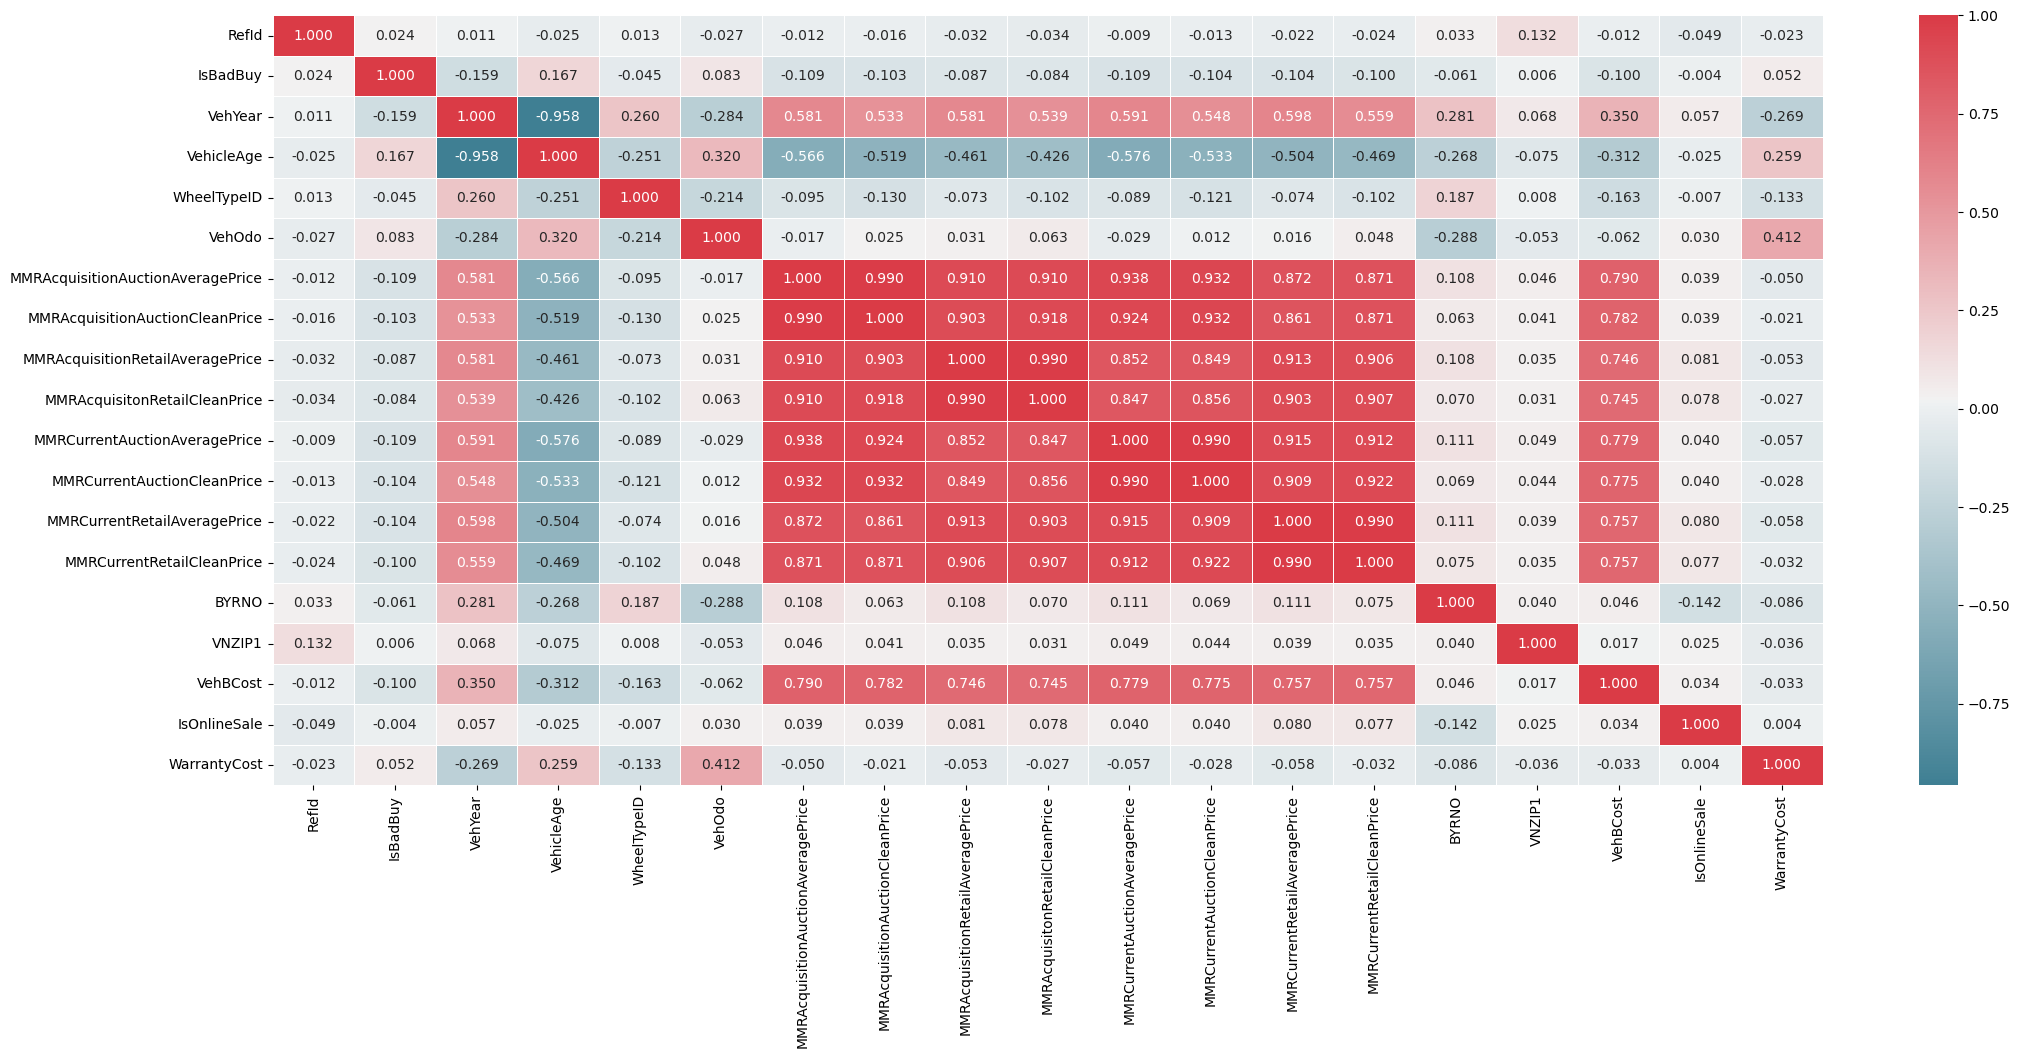

In [10]:
plt.figure(figsize=(25,10))
sns.heatmap(corr_matrix, annot=True, cmap = sns.diverging_palette(220, 10, as_cmap=True),linewidths=.5, fmt= '.3f')

**Observation**
1. It seems many of the columns are correlated with each other such as 
    * MMRCurrentAuctionCleanPrice -> MMRCurrentAuctionAveragePrice 99%
    * MMRCurrentRetailCleanPrice -> MMRCurrentRetailAveragePrice 99%
    * MMRAcquisitionAuctionCleanPrice -> MMRAcquisitionAuctionAveragePrice 99%
    * MMRAcquisitonRetailCleanPrice -> MMRQcquisitionRetailAverageprice 99%
    * VehYear -> VehicleAge 95.8%
2. we can safely remove one of these features from the dataset

array([[<AxesSubplot:title={'center':'RefId'}>,
        <AxesSubplot:title={'center':'IsBadBuy'}>,
        <AxesSubplot:title={'center':'VehYear'}>,
        <AxesSubplot:title={'center':'VehicleAge'}>],
       [<AxesSubplot:title={'center':'WheelTypeID'}>,
        <AxesSubplot:title={'center':'VehOdo'}>,
        <AxesSubplot:title={'center':'MMRAcquisitionAuctionAveragePrice'}>,
        <AxesSubplot:title={'center':'MMRAcquisitionAuctionCleanPrice'}>],
       [<AxesSubplot:title={'center':'MMRAcquisitionRetailAveragePrice'}>,
        <AxesSubplot:title={'center':'MMRAcquisitonRetailCleanPrice'}>,
        <AxesSubplot:title={'center':'MMRCurrentAuctionAveragePrice'}>,
        <AxesSubplot:title={'center':'MMRCurrentAuctionCleanPrice'}>],
       [<AxesSubplot:title={'center':'MMRCurrentRetailAveragePrice'}>,
        <AxesSubplot:title={'center':'MMRCurrentRetailCleanPrice'}>,
        <AxesSubplot:title={'center':'BYRNO'}>,
        <AxesSubplot:title={'center':'VNZIP1'}>],
       [<AxesSu

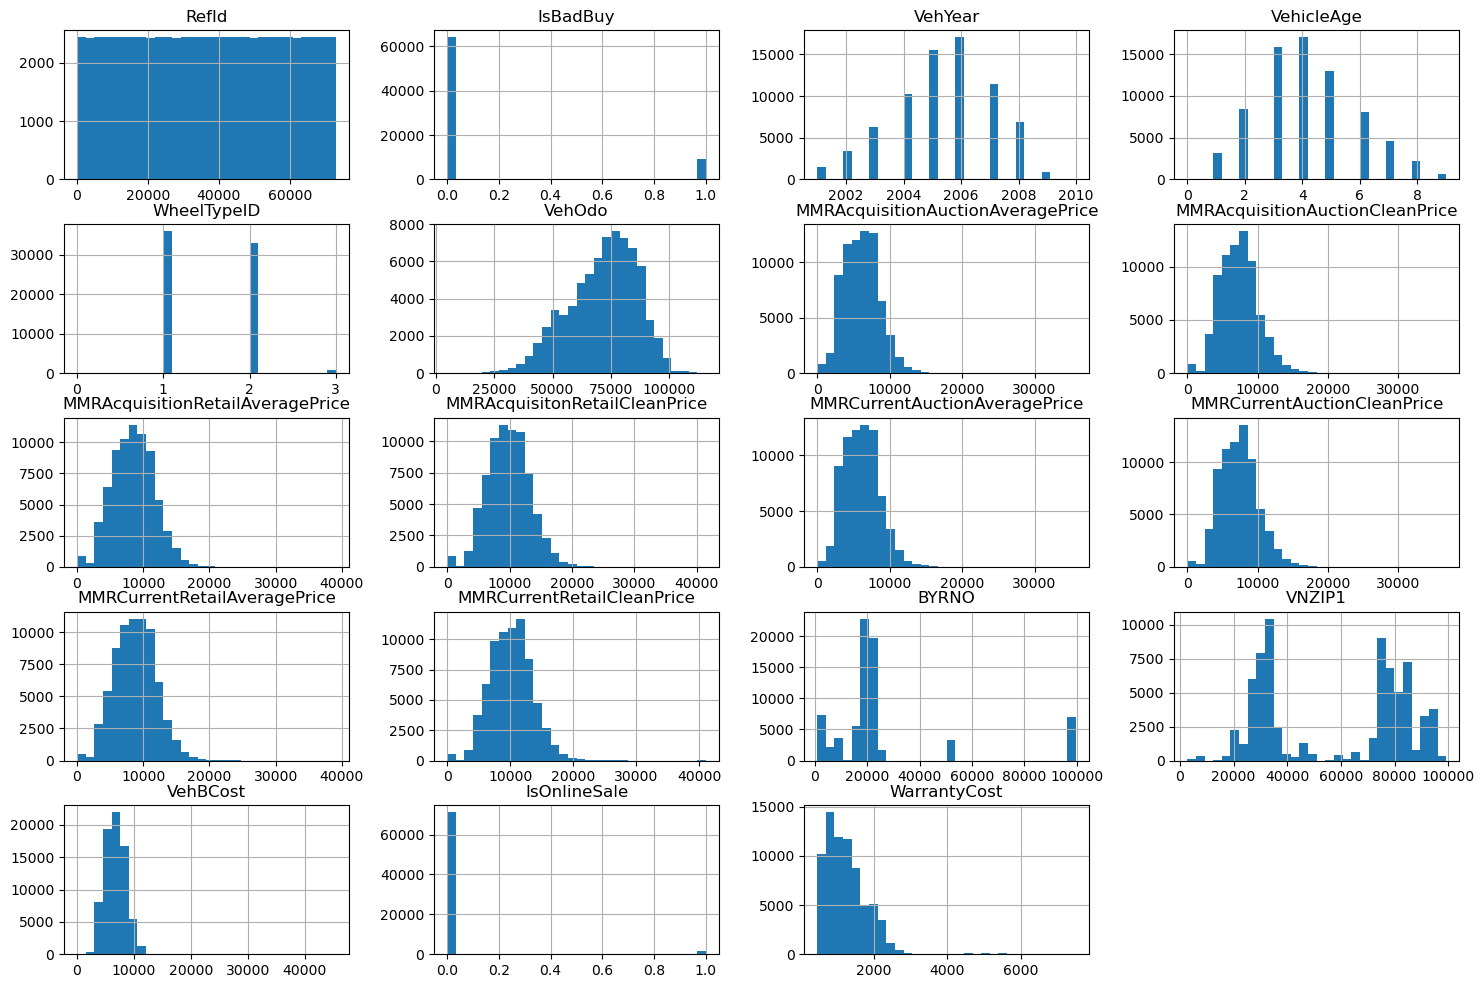

In [11]:
cars_info_df.hist(bins=30,figsize=(18, 12))

<AxesSubplot:>

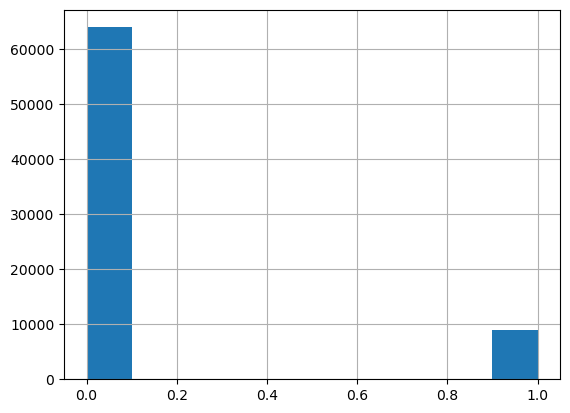

In [12]:
cars_info_df['IsBadBuy'].hist()

In [13]:
cars_info_df.Nationality.unique()

array(['OTHER ASIAN', 'AMERICAN', 'TOP LINE ASIAN', 'OTHER', nan],
      dtype=object)

## Feature Selection

In [14]:
ids = ['RefId', 'BYRNO', 'WheelTypeID']
not_useful_cols = ['VNZIP1','PurchDate', 'Make', 'Model', 'SubModel', 'Trim', 'VNST', 'Color']
highly_corr_cols = ['MMRCurrentAuctionCleanPrice',    # 99% corr with MMRCurrentAuctionAveragePrice
                    'MMRCurrentRetailCleanPrice',      # 99% corr with MMRCurrentRetailAveragePrice
                    'MMRAcquisitionAuctionCleanPrice', # 99% corr with MMRAcquisitionAuctionAveragePrice
                    'MMRAcquisitonRetailCleanPrice',    # 99% corr with MMRQcquisitionRetailAverageprice
                    'VehYear'                          # 96% corr with 'VehicleAge'
                   ]
total_drop_cols = ids + not_useful_cols + highly_corr_cols

Drop all the unuseful columns

In [15]:
cars_info_df.drop(total_drop_cols, axis=1, inplace=True)
cars_info_df

,IsBadBuy,Auction,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionAveragePrice,MMRCurrentRetailAveragePrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost
0,0,ADESA,3,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,11636.0,7451.0,11597.0,NaN,NaN,7100.0,0,1113
1,0,ADESA,5,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,10897.0,7456.0,11374.0,NaN,NaN,7600.0,0,1053
2,0,ADESA,4,AUTO,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,6943.0,4035.0,7146.0,NaN,NaN,4900.0,0,1389
3,0,ADESA,5,AUTO,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,4658.0,1844.0,4375.0,NaN,NaN,4100.0,0,630
4,0,ADESA,4,MANUAL,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,7723.0,3247.0,6739.0,NaN,NaN,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,ADESA,8,AUTO,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2656.0,2190.0,4836.0,NaN,NaN,4200.0,0,993
72979,0,ADESA,2,AUTO,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7431.0,6785.0,10151.0,NaN,NaN,6200.0,0,1038
72980,0,ADESA,4,AUTO,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9729.0,8375.0,11831.0,NaN,NaN,8200.0,0,1893
72981,0,ADESA,3,AUTO,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7434.0,6590.0,10099.0,NaN,NaN,7000.0,0,1974


## Create a Test Set

In [16]:
X = cars_info_df.drop(['IsBadBuy'], axis=1)
y = cars_info_df['IsBadBuy']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,# keeping ratio  of IsBadBuy
    random_state=42
)

## Separate Numerical and Categorical Columns

In [18]:
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
numerical_cols

['VehicleAge',
 'VehOdo',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentRetailAveragePrice',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost']

In [19]:
categorical_cols = X_train.select_dtypes(include=object).columns.tolist()
categorical_cols

['Auction',
 'Transmission',
 'WheelType',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'PRIMEUNIT',
 'AUCGUART']

## Preparing Data

Removing unwanted columns from dataframe

In [20]:
X_train =  X_train[numerical_cols + categorical_cols].copy()
X_test = X_test[numerical_cols + categorical_cols].copy()

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [41]:
# Preprocessing categorical data
categorical_xform = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('oneHot', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ]
)

# Preprocessing numerical data
numerical_xform = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('scaler', StandardScaler())
    ]
)

In [42]:
# Bundle numerical and categorical columns
preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_xform, numerical_cols),
        ('cat', categorical_xform, categorical_cols)
])

4. Train & evaluate different machine learning models, tune hyperparameters and reduce overfitting to improve the model.

## Model Selection
trying out different models and find best model for fine-tuning

#### Testing out Different models

In [ ]:
N_JOBS =-1

In [55]:
rdm_forst_clf = RandomForestClassifier(n_jobs=N_JOBS, random_state=42)
xgb_clf = XGBClassifier(n_jobs=N_JOBS, random_state=42,  tree_method='gpu_hist')
lgbm_clf = LGBMClassifier(n_jobs=N_JOBS, random_state=42)

estimators = [
    ('RandomForestClf', rdm_forst_clf),
    ('XGBClf', xgb_clf),
    ('LGBMClf', lgbm_clf),
]

In [51]:
for name_estim, estimator in estimators:
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        (name_estim, estimator)
    ])
    print(f'Traing : {name_estim}')
    clf.fit(X_train,y_train)
    print(f'Evaluating: {name_estim}')
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print(f'{name_estim} train accurary: ',train_acc)
    print(f'{name_estim} test accurary: ',test_acc)
    print(f'{name_estim} test ROC: ',roc)
    print()

Traing : RandomForestClf
Evaluating: RandomForestClf
RandomForestClf train accurary:  0.9999828726064468
RandomForestClf test accurary:  0.8774405699801329
RandomForestClf test ROC:  0.6809948959054535

Traing : XGBClf
Evaluating: XGBClf
XGBClf train accurary:  0.8917720001370192
XGBClf test accurary:  0.8751113242447078
XGBClf test ROC:  0.7049435825443362

Traing : LGBMClf
Evaluating: LGBMClf
LGBMClf train accurary:  0.8801938820950228
LGBMClf test accurary:  0.8777145988901829
LGBMClf test ROC:  0.7080096294146241



Fine-tuning the hyperparameter using GridSearchCV

#### Fine-Tune RandomForest

In [65]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
scoring = {"roc": "roc_auc", 
           "accuracy": 'accuracy',
           "f1": 'f1',
}
           

In [66]:
import random
# First-Fine tune Random forest
random_forest_clf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('RandomForestClf', rdm_forst_clf)
    ])
param_grid = {
        'RandomForestClf__n_estimators': list(range(10, 300, 50)),
        'RandomForestClf__max_depth':list(range(1, 30)),
        'RandomForestClf__max_leaf_nodes':list(range(2,100)),
        'RandomForestClf__min_samples_split': [2, 3, 4]
}


# param_grid = {
#         'RandomForestClf__n_estimators': list(range(10, 300, 50)),
#         'RandomForestClf__max_depth':list(range(1, 30)),
#         'RandomForestClf__max_leaf_nodes':list(range(2,100)),
#         'RandomForestClf__min_samples_split': [2, 3, 4]
# }

0.6919699002695113

#### Fine tune XGBClassifier

In [ ]:
xgb_clf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('XGBClassifier', xgb_clf)
    ])

In [ ]:
grd_cv_xgb = GridSearchCV(
    estimator = xgb_clf_pipeline,
    param_grid=param_grid,
    n_jobs=N_JOBS,
    scoring=scoring,
    refit="roc",
)
grd_cv_xgb.fit(X_train,y_train)

#### Fine tune LGBMClassifier

In [ ]:
lgbm_clf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('LGBMClassifier', lgbm_clf)
    ])

In [ ]:
grd_cv_lgbm = GridSearchCV(
    estimator = xgb_clf_pipeline,
    param_grid=param_grid,
    n_jobs=N_JOBS,
    scoring=scoring,
    refit="roc",
    
)
grd_cv_lgbm.fit(X_train,y_train)

****

# References

* https://www.kaggle.com/code/dingli/predict-if-a-car-purchased-at-auction-is-a-lemon
* 